<a href="https://www.kaggle.com/code/biswasbarsha/load-default-prediction?scriptVersionId=263027415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/data_descriptions.csv
/kaggle/input/dataset/train.csv
/kaggle/input/dataset/prediction_submission.csv
/kaggle/input/dataset/test.csv


In [2]:
import pandas as pd
data_descriptions = pd.read_csv('/kaggle/input/dataset/data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import any other packages you may want to use

#Label Encoding for multiple categories
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#Build a logistic regression classifier
from sklearn.linear_model import LogisticRegression

#XGBoost Classifier
from xgboost import XGBClassifier

In [5]:
train_df = pd.read_csv("/kaggle/input/dataset/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
test_df = pd.read_csv("/kaggle/input/dataset/test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


In [7]:
# check for NaN values
train_df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

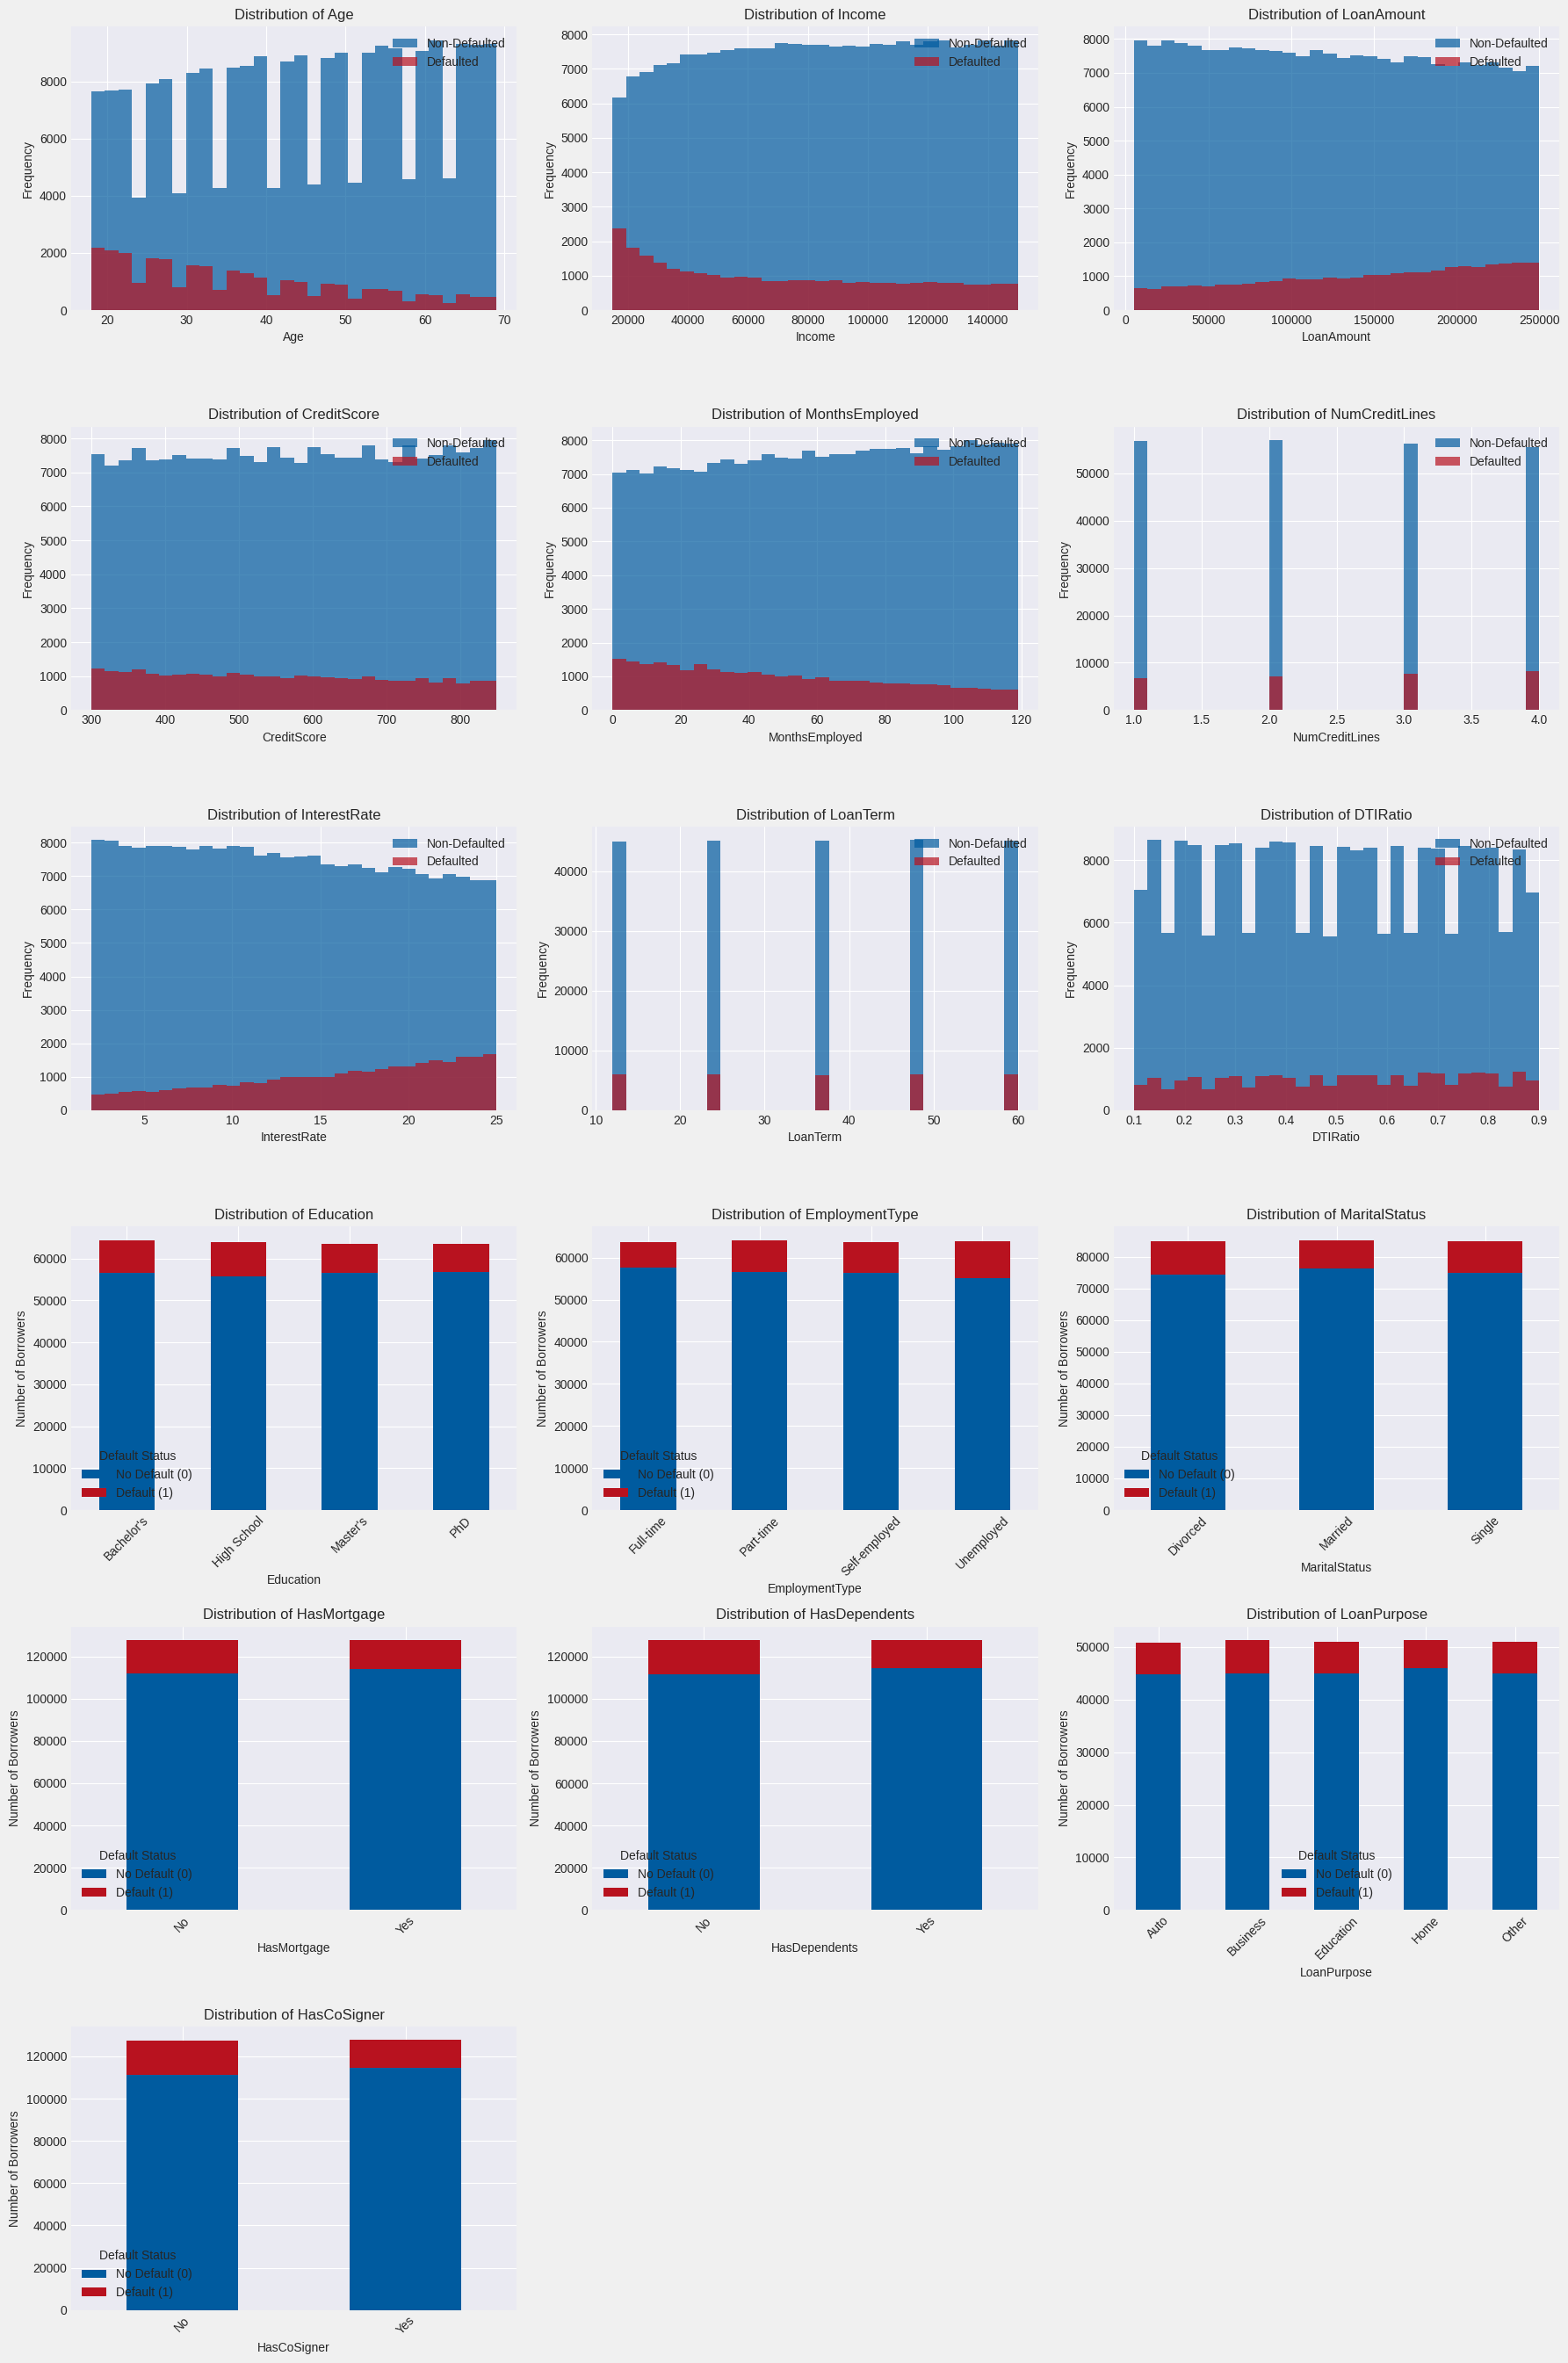

In [9]:
# Numerical Columns (for Histograms)
numerical_cols = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'
]

# Categorical Columns (for Bar Charts)
categorical_cols = [
    'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
    'HasDependents', 'LoanPurpose', 'HasCoSigner'
]

all_cols_to_plot = numerical_cols + categorical_cols
data = train_df 

# --- 2. Optimize & Set Dark Style ---

# Set a dark Matplotlib style for better visualization
plt.style.use('seaborn-v0_8-darkgrid') 

# Filter the DataFrame once for performance
non_defaulted = data[data['Default'] == 0]
defaulted = data[data['Default'] == 1]

# --- 3. Setup Plot Canvas ---

num_plots = len(all_cols_to_plot)
n_cols = 3 
n_rows = (num_plots + n_cols - 1) // n_cols 

# Set figure background explicitly for clarity with dark plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4.5), facecolor='#f0f0f0') 
axes = axes.flatten()

# --- 4. Generate Plots ---

# Define dark, high-contrast colors
COLOR_NON_DEFAULT = '#005b9f'  # Dark Blue
COLOR_DEFAULT = '#b8121f'     # Deep Red

for i, col in enumerate(all_cols_to_plot):
    ax = axes[i]
    
    # --- A. NUMERICAL PLOT (Histogram) ---
    if col in numerical_cols:
        # Use pre-filtered data with dark colors
        non_defaulted[col].hist(ax=ax, bins=30, alpha=0.7, label='Non-Defaulted', color=COLOR_NON_DEFAULT)
        defaulted[col].hist(ax=ax, bins=30, alpha=0.7, label='Defaulted', color=COLOR_DEFAULT)
        ax.set_ylabel('Frequency')
        ax.legend(loc='upper right')

    # --- B. CATEGORICAL PLOT (Bar Chart) ---
    elif col in categorical_cols:
        # Calculate stacked counts
        default_counts = data.groupby(col)['Default'].value_counts().unstack(fill_value=0)
        
        # Plot stacked bar chart using the defined colors
        default_counts.plot(kind='bar', stacked=True, ax=ax, color=[COLOR_NON_DEFAULT, COLOR_DEFAULT])
        ax.set_ylabel('Number of Borrowers')
        ax.legend(title='Default Status', labels=['No Default (0)', 'Default (1)'])
        ax.tick_params(axis='x', rotation=45) 
        
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)

# --- 5. Final Cleanup ---

# Hide any unused subplots
for i in range(num_plots, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Reset Matplotlib style to default if you have other plots later
plt.style.use('default')

Patterns I can see of the defaulters:
1. Young Age
2. Less Income
3. High Loan Amount
4. Less Months of Employed
5. High Interest rate

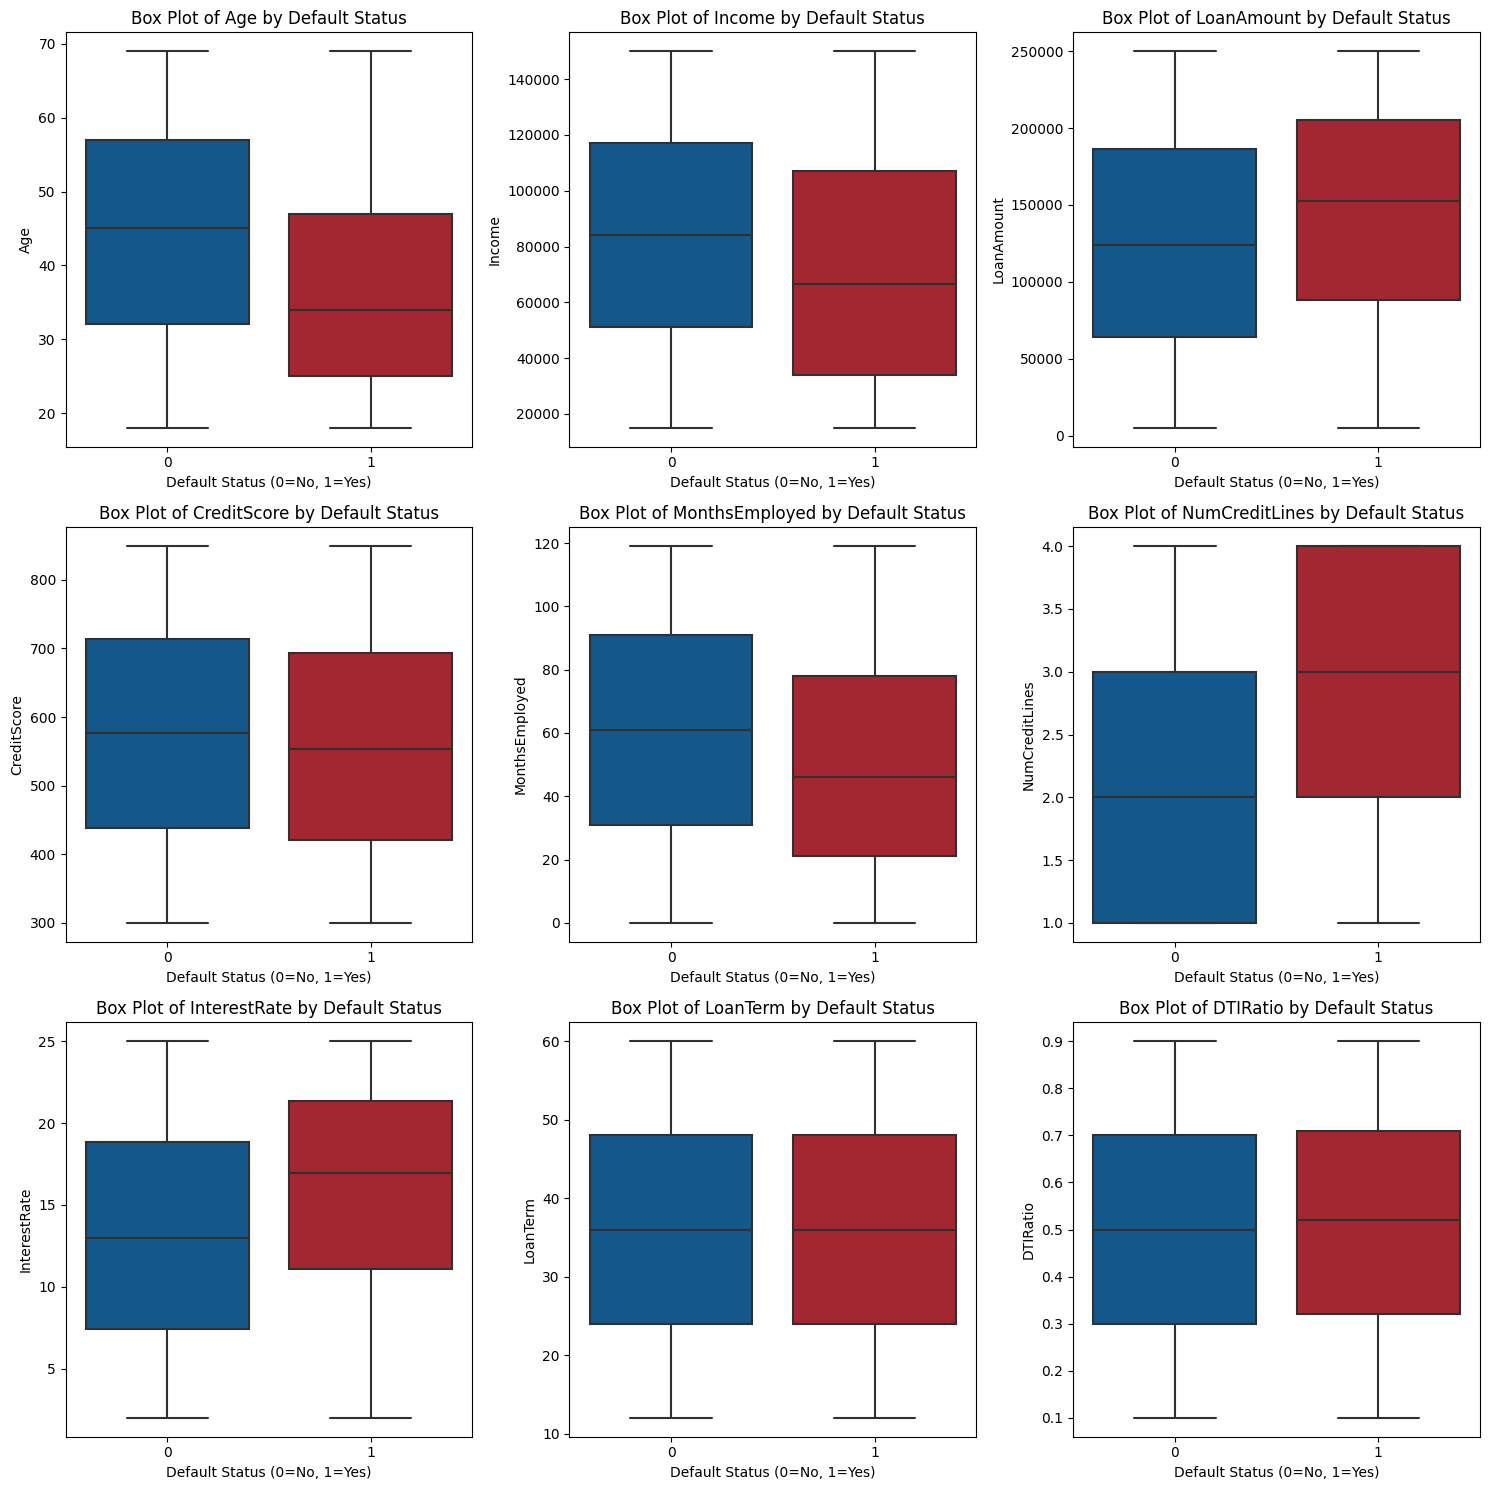

In [10]:
# 1. Define the numerical columns (for the box plot distributions)
numerical_cols = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'
]

# 2. Setup the plot canvas
num_plots = len(numerical_cols)
n_cols = 3 
n_rows = (num_plots + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()

# Set a style for better visualization (optional)
sns.set_style("whitegrid") 

# 3. Generate the box plots
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    
    # Use seaborn.boxplot to easily plot numerical data against the categorical target
    sns.boxplot(
        x='Default',       # The categorical grouping variable
        y=col,             # The numerical data to plot
        data=train_df,
        ax=ax,
        palette=['#005b9f', '#b8121f'] # Darker colors for contrast
    )
    
    ax.set_title(f'Box Plot of {col} by Default Status', fontsize=12)
    ax.set_xlabel('Default Status (0=No, 1=Yes)', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

# Hide any unused subplots
for i in range(num_plots, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

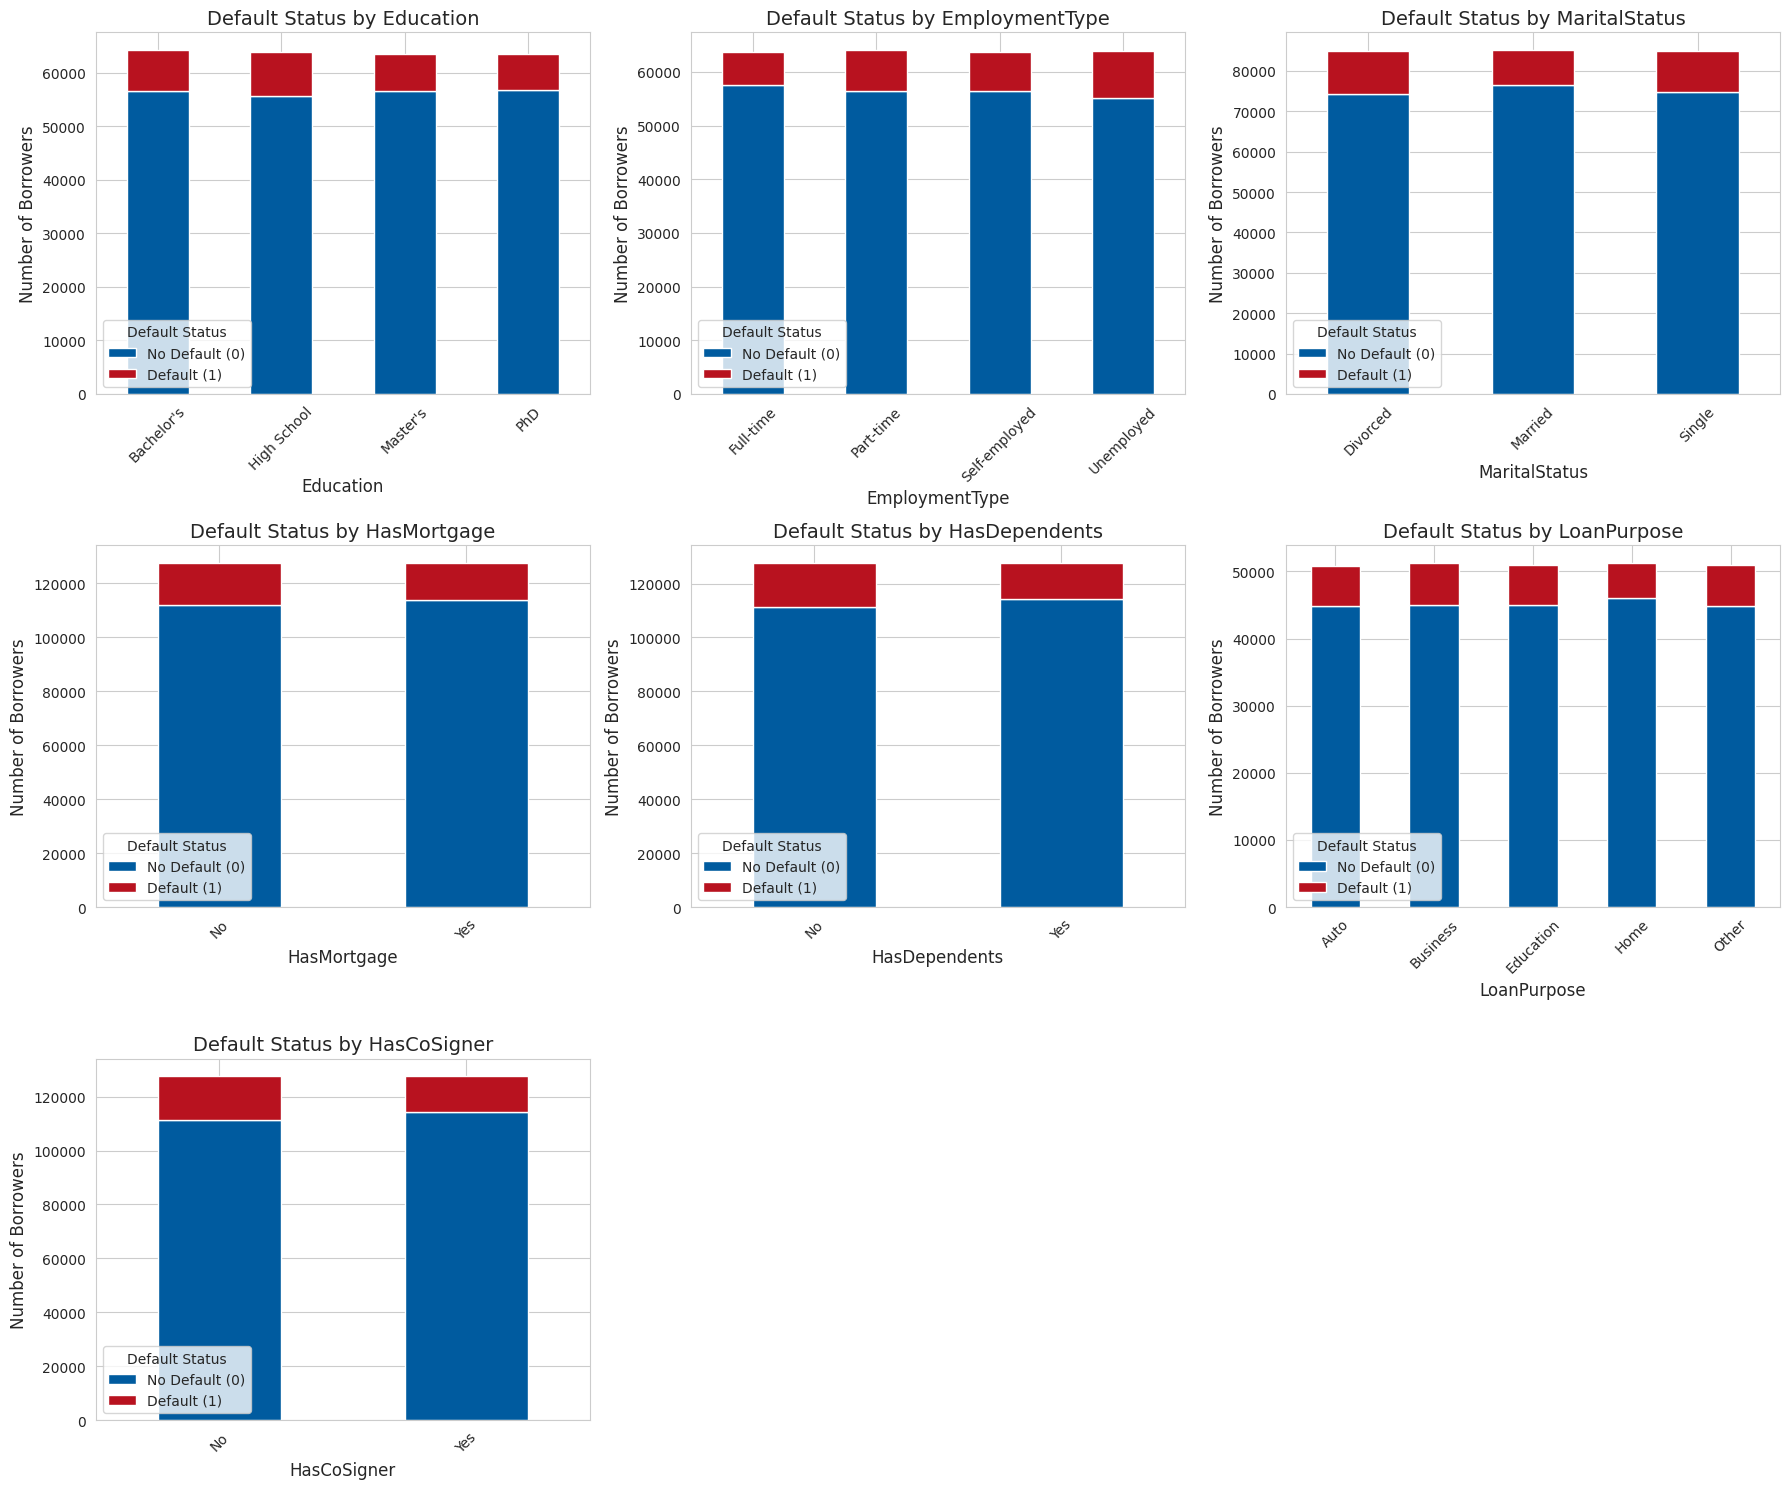

In [11]:
# 1. Define the categorical columns 
categorical_cols = [
    'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
    'HasDependents', 'LoanPurpose', 'HasCoSigner'
]

# Define dark, high-contrast colors (consistent with previous plots)
COLOR_NON_DEFAULT = '#005b9f'  # Dark Blue
COLOR_DEFAULT = '#b8121f'     # Deep Red

# 2. Setup the plot canvas
num_plots = len(categorical_cols)
n_cols = 3 
n_rows = (num_plots + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

# 3. Generate the stacked bar plots
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Calculate the counts of Default (1) and Non-Default (0) for the current column
    # Group by the feature, then the target, and unstack to get columns for 0 and 1
    default_counts = train_df.groupby(col)['Default'].value_counts().unstack(fill_value=0)
    
    # Plot the counts as a stacked bar chart
    default_counts.plot(kind='bar', stacked=True, ax=ax, color=[COLOR_NON_DEFAULT, COLOR_DEFAULT])
    
    ax.set_title(f'Default Status by {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Number of Borrowers', fontsize=12)
    
    # Clean up legend and rotation
    ax.legend(title='Default Status', labels=['No Default (0)', 'Default (1)'])
    ax.tick_params(axis='x', rotation=45) 

# Hide any unused subplots
for j in range(num_plots, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
# NumCreditLines, LoanTerm, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner is not helping to find any trend 
# so, let's remove it

train_df1 = train_df.drop(columns = ['NumCreditLines', 'LoanTerm', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents' \
                                     , 'LoanPurpose', 'HasCoSigner'])
train_df1

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,DTIRatio,Default
0,I38PQUQS96,56,85994,50587,520,80,15.23,0.44,0
1,HPSK72WA7R,69,50432,124440,458,15,4.81,0.68,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,21.17,0.31,1
3,V2KKSFM3UN,32,31713,44799,743,0,7.07,0.23,0
4,EY08JDHTZP,60,20437,9139,633,8,6.51,0.73,0
...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,14.11,0.85,0
255343,98R4KDHNND,32,51953,189899,511,14,11.55,0.21,1
255344,XQK1UUUNGP,56,84820,208294,597,70,5.29,0.50,0
255345,JAO28CPL4H,42,85109,60575,809,40,20.90,0.44,0


In [13]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   DTIRatio        255347 non-null  float64
 8   Default         255347 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 17.5+ MB


In [14]:
# X = train_df1.drop(columns = ['Default'])
# y = train_df1['Default']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# X_train_loanid = X_train['LoanID']

# X_train= X_train.drop(columns = 'LoanID')

In [15]:
X = train_df1.drop(columns = ['Default'])
y = train_df1['Default']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_loanid = X['LoanID']

X= X.drop(columns = 'LoanID')

# Build, Train and Evaluate Logistic Regression

In [16]:
LogisticRegression = LogisticRegression(penalty='l1', C=1.0, class_weight='balanced', solver='liblinear')
LogisticRegression.fit(X, y)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [17]:
# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

DummyClassifier(strategy='stratified')

In [18]:
test_df.shape

(109435, 17)

In [19]:
test_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109430,V12FM6UKMS,67,76970,108110,404,67,3,10.51,36,0.18,PhD,Self-employed,Married,Yes,Yes,Auto,No
109431,GLRB9P0CQO,44,108272,238508,335,28,1,9.65,24,0.32,PhD,Full-time,Divorced,Yes,Yes,Education,No
109432,RWCJ3SL2J6,54,73526,18513,576,75,2,17.22,36,0.62,Master's,Part-time,Divorced,No,Yes,Education,No
109433,2Z9IZS4OMY,60,75296,38414,369,71,4,17.69,36,0.66,PhD,Part-time,Married,No,No,Business,Yes


In [20]:
# NumCreditLines, LoanTerm, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner is not helping to find any trend 
# so, let's remove it

test_df1 = test_df.drop(columns = ['NumCreditLines', 'LoanTerm', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents' \
                                     , 'LoanPurpose', 'HasCoSigner'])
test_df1

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,DTIRatio
0,7RYZGMKJIR,32,131645,43797,802,23,6.10,0.13
1,JDL5RH07AM,61,134312,18402,369,87,12.99,0.59
2,STAL716Y79,55,115809,151774,563,3,5.51,0.82
3,SO0KKJ3IQB,58,94970,55789,337,24,23.93,0.77
4,T99CWTYDCP,63,71727,189798,451,52,22.05,0.44
...,...,...,...,...,...,...,...,...
109430,V12FM6UKMS,67,76970,108110,404,67,10.51,0.18
109431,GLRB9P0CQO,44,108272,238508,335,28,9.65,0.32
109432,RWCJ3SL2J6,54,73526,18513,576,75,17.22,0.62
109433,2Z9IZS4OMY,60,75296,38414,369,71,17.69,0.66


In [21]:
test_df1.shape

(109435, 8)

In [22]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS
# predicted_probability_act = LogisticRegression.predict_proba(X_test.drop(['LoanID'], axis=1))[:,1]
predicted_probability_act = LogisticRegression.predict_proba(test_df1.drop(['LoanID'], axis=1))[:,1]
predicted_probability_act
# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]
predicted_probability

array([0., 1., 0., ..., 0., 0., 0.])

In [23]:
predicted_probability_act.shape

(109435,)

In [24]:
loan_id_col = test_df1['LoanID'].values

loan_id_col_1d = np.ravel(loan_id_col)

# --- Final DataFrame Creation ---
prediction_df_act = pd.DataFrame({
    'LoanID': loan_id_col_1d, # Use the flattened array
    'predicted_probability': predicted_probability_act
})

# Note on accessing values: 
# X_test['LoanID'].values is cleaner than X_test[['LoanID']].values[:, 0]
# Combine predictions with label column into a dataframe
# prediction_df = pd.DataFrame({'LoanID': X_test[['LoanID']].values[:, 0],
#                              'predicted_probability': predicted_probability})

In [25]:
loan_id_col_1d.shape

(109435,)

In [26]:
prediction_df_act

,LoanID,predicted_probability
0,7RYZGMKJIR,0.266282
1,JDL5RH07AM,0.123172
2,STAL716Y79,0.305272
3,SO0KKJ3IQB,0.512758
4,T99CWTYDCP,0.500814
...,...,...
109430,V12FM6UKMS,0.183262
109431,GLRB9P0CQO,0.520827
109432,RWCJ3SL2J6,0.279868
109433,2Z9IZS4OMY,0.293912


In [27]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df_act.shape)
prediction_df_act.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.266282
1,JDL5RH07AM,0.123172
2,STAL716Y79,0.305272
3,SO0KKJ3IQB,0.512758
4,T99CWTYDCP,0.500814
5,0SNHFWV4UP,0.443216
6,S6ITP6LGYS,0.237706
7,A6I7U12IRJ,0.359106
8,8W6KY50JU4,0.478251
9,THFQ08OLMU,0.453570


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [28]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df_act.to_csv("/kaggle/prediction_submission.csv", index=False)
submission = pd.read_csv("/kaggle/prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [29]:
submission

,LoanID,predicted_probability
0,7RYZGMKJIR,0.266282
1,JDL5RH07AM,0.123172
2,STAL716Y79,0.305272
3,SO0KKJ3IQB,0.512758
4,T99CWTYDCP,0.500814
...,...,...
109430,V12FM6UKMS,0.183262
109431,GLRB9P0CQO,0.520827
109432,RWCJ3SL2J6,0.279868
109433,2Z9IZS4OMY,0.293912


In [30]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [31]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [32]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [33]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

# from sklearn.metrics import roc_auc_score

# # Calculate the AUC score
# auc_score = roc_auc_score(, predicted_probability_act)

# print(f"The AUC score is: {auc_score:.4f}")

# Build, Train and Evaluate XGBoost

In [34]:
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS
# predicted_probability_act = LogisticRegression.predict_proba(X_test.drop(['LoanID'], axis=1))[:,1]
predicted_probability_act1 = XGBClassifier.predict_proba(test_df1.drop(['LoanID'], axis=1))[:,1]
predicted_probability_act1
# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]
predicted_probability

array([0., 0., 0., ..., 0., 1., 0.])

In [36]:
predicted_probability_act1.shape

(109435,)

In [37]:
loan_id_col = test_df1['LoanID'].values

loan_id_col_1d = np.ravel(loan_id_col)

# --- Final DataFrame Creation ---
prediction_df_act1 = pd.DataFrame({
    'LoanID': loan_id_col_1d, # Use the flattened array
    'predicted_probability': predicted_probability_act1
})

# Note on accessing values: 
# X_test['LoanID'].values is cleaner than X_test[['LoanID']].values[:, 0]
# Combine predictions with label column into a dataframe
prediction_df1 = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [38]:
prediction_df_act1

,LoanID,predicted_probability
0,7RYZGMKJIR,0.108777
1,JDL5RH07AM,0.023222
2,STAL716Y79,0.025896
3,SO0KKJ3IQB,0.126046
4,T99CWTYDCP,0.073386
...,...,...
109430,V12FM6UKMS,0.021640
109431,GLRB9P0CQO,0.104630
109432,RWCJ3SL2J6,0.056846
109433,2Z9IZS4OMY,0.035080


In [39]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df_act1.shape)
prediction_df_act1.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.108777
1,JDL5RH07AM,0.023222
2,STAL716Y79,0.025896
3,SO0KKJ3IQB,0.126046
4,T99CWTYDCP,0.073386
5,0SNHFWV4UP,0.071282
6,S6ITP6LGYS,0.033373
7,A6I7U12IRJ,0.072351
8,8W6KY50JU4,0.126535
9,THFQ08OLMU,0.124292


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [40]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df_act1.to_csv("/kaggle/prediction_submission_xgboost.csv", index=False)
submission1 = pd.read_csv("/kaggle/prediction_submission_xgboost.csv")

assert isinstance(submission1, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [41]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission1.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission1.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [42]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'
# submission1.shape[0] 

In [43]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission1.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [44]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

# from sklearn.metrics import roc_auc_score

# Assuming you have the following variables:
# y_test: The true binary labels (0s and 1s) from your test set.
# y_proba_positive: The predicted probability of the positive class (y=1).
#                   This usually comes from model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
# auc_score1 = roc_auc_score(y_test, predicted_probability_act1)

# print(f"The AUC score is: {auc_score1:.4f}")